In [1]:
import numpy as np
import pandas as pd
#import io
#from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

### Running script in Google Colab

In [ ]:
#file_upload = files.upload()

Saving owid-co2-data.csv to owid-co2-data.csv


In [ ]:
#owid_co2_df = pd.read_csv(io.BytesIO(file_upload['owid-co2-data.csv']))
#owid_co2_df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


### Runing script in desktop editor 

In [2]:
owid_co2_df = pd.read_csv('owid-co2-data.csv')
owid_co2_df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


### Handling Missing Values

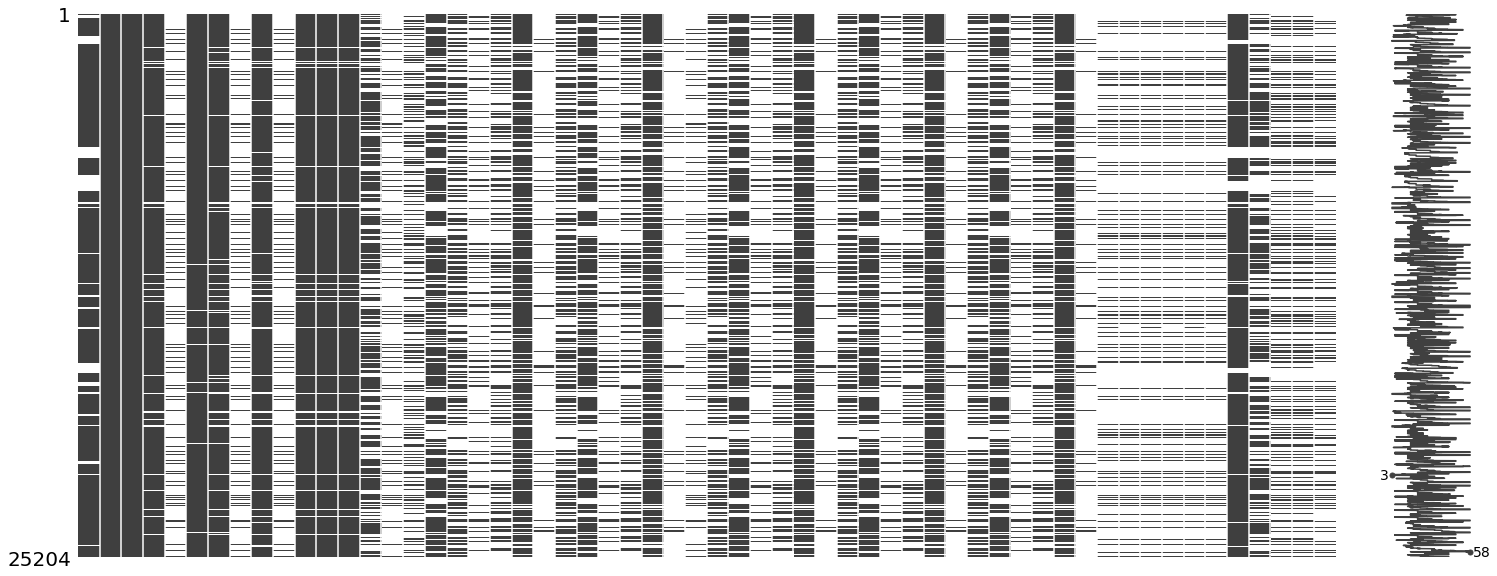

In [ ]:
import missingno as msno

msno.matrix(owid_co2_df)

### Summary of missing values per column

In [ ]:
missing_table = pd.DataFrame({i:[owid_co2_df[i].isnull().sum(), owid_co2_df[i].isnull().sum()/len(owid_co2_df[i])] for i in owid_co2_df.columns})
missing_table.to_csv('missing_values_summary.csv', encoding='utf-8', index=False)

In [ ]:
country_names = sorted(set(owid_co2_df['country']))
summary_val = {i:[] for i in owid_co2_df.columns}
summary_val['total_percentage_missing'] = []
summary_per = {i:[] for i in owid_co2_df.columns}

for idx, i in enumerate(country_names): 
  country_data = owid_co2_df[owid_co2_df['country'] == i]
  globals()[i] = country_data
  summary_val['iso_code'].append(country_data[['iso_code']].iloc[0][0])
  summary_val['country'].append(i)
  
  for col in country_data.columns:
    if col != 'iso_code' and col != 'country':
      summary_val[col].append(country_data[col].isna().sum())
      summary_per[col].append((country_data[col].isna().sum()/len(country_data[col]))*100)
  
  summary_val['total_percentage_missing'].append((sum(country_data.isna().sum())/(len(country_data)*(len(owid_co2_df.columns)-2)))*100)

summary_per['iso_code'] = summary_val['iso_code']
summary_per['country'] = summary_val['country']
summary_val = pd.DataFrame(summary_val)
summary_per = pd.DataFrame(summary_per)

### Summary of Missing values per column for every country 

In [ ]:
summary_val.to_csv('values_missing.csv', encoding='utf-8', index=False)
summary_per.to_csv('values_missing_percentage.csv', encoding='utf-8', index=False)

### Deliting of countries with more than 60% of missing values in the total 

In [ ]:
for i in summary_val[summary_val['total_percentage_missing'] > 60]['country']:
  if i != 'EU-28' or i != 'Europe (excl. EU-27)' or i != 'International transport':
    owid_co2_df = owid_co2_df.drop(owid_co2_df.index[owid_co2_df['country'] == i].to_list())
    summary_per = summary_per.drop(summary_per.index[summary_per['country'] == i].to_list())
    summary_val = summary_val.drop(summary_val.index[summary_val['country'] == i].to_list()) 

### Countries that have at least a column with 100% of missing values in total

In [ ]:
#Check if there is 100% of missing values in some column in the remaining data
countries_without_regression = []
for idx, i in summary_per.iterrows():
  check_columns = [True for j in summary_per.columns if j != 'iso_code' and j != 'country' and summary_per[[j][0]][idx] == 100]
  if check_columns:
    countries_without_regression.append(i['country'])

print(countries_without_regression)

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Asia', 'Asia (excl. China & India)', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chile', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Cyprus', 'Democratic Republic of Congo', 'Dominican Republic', 'EU-27', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Europe', 'Europe (excl. EU-28)', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Jordan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'New Caledoni

### China in plots: scatter plot of the variables in comparation with the year 

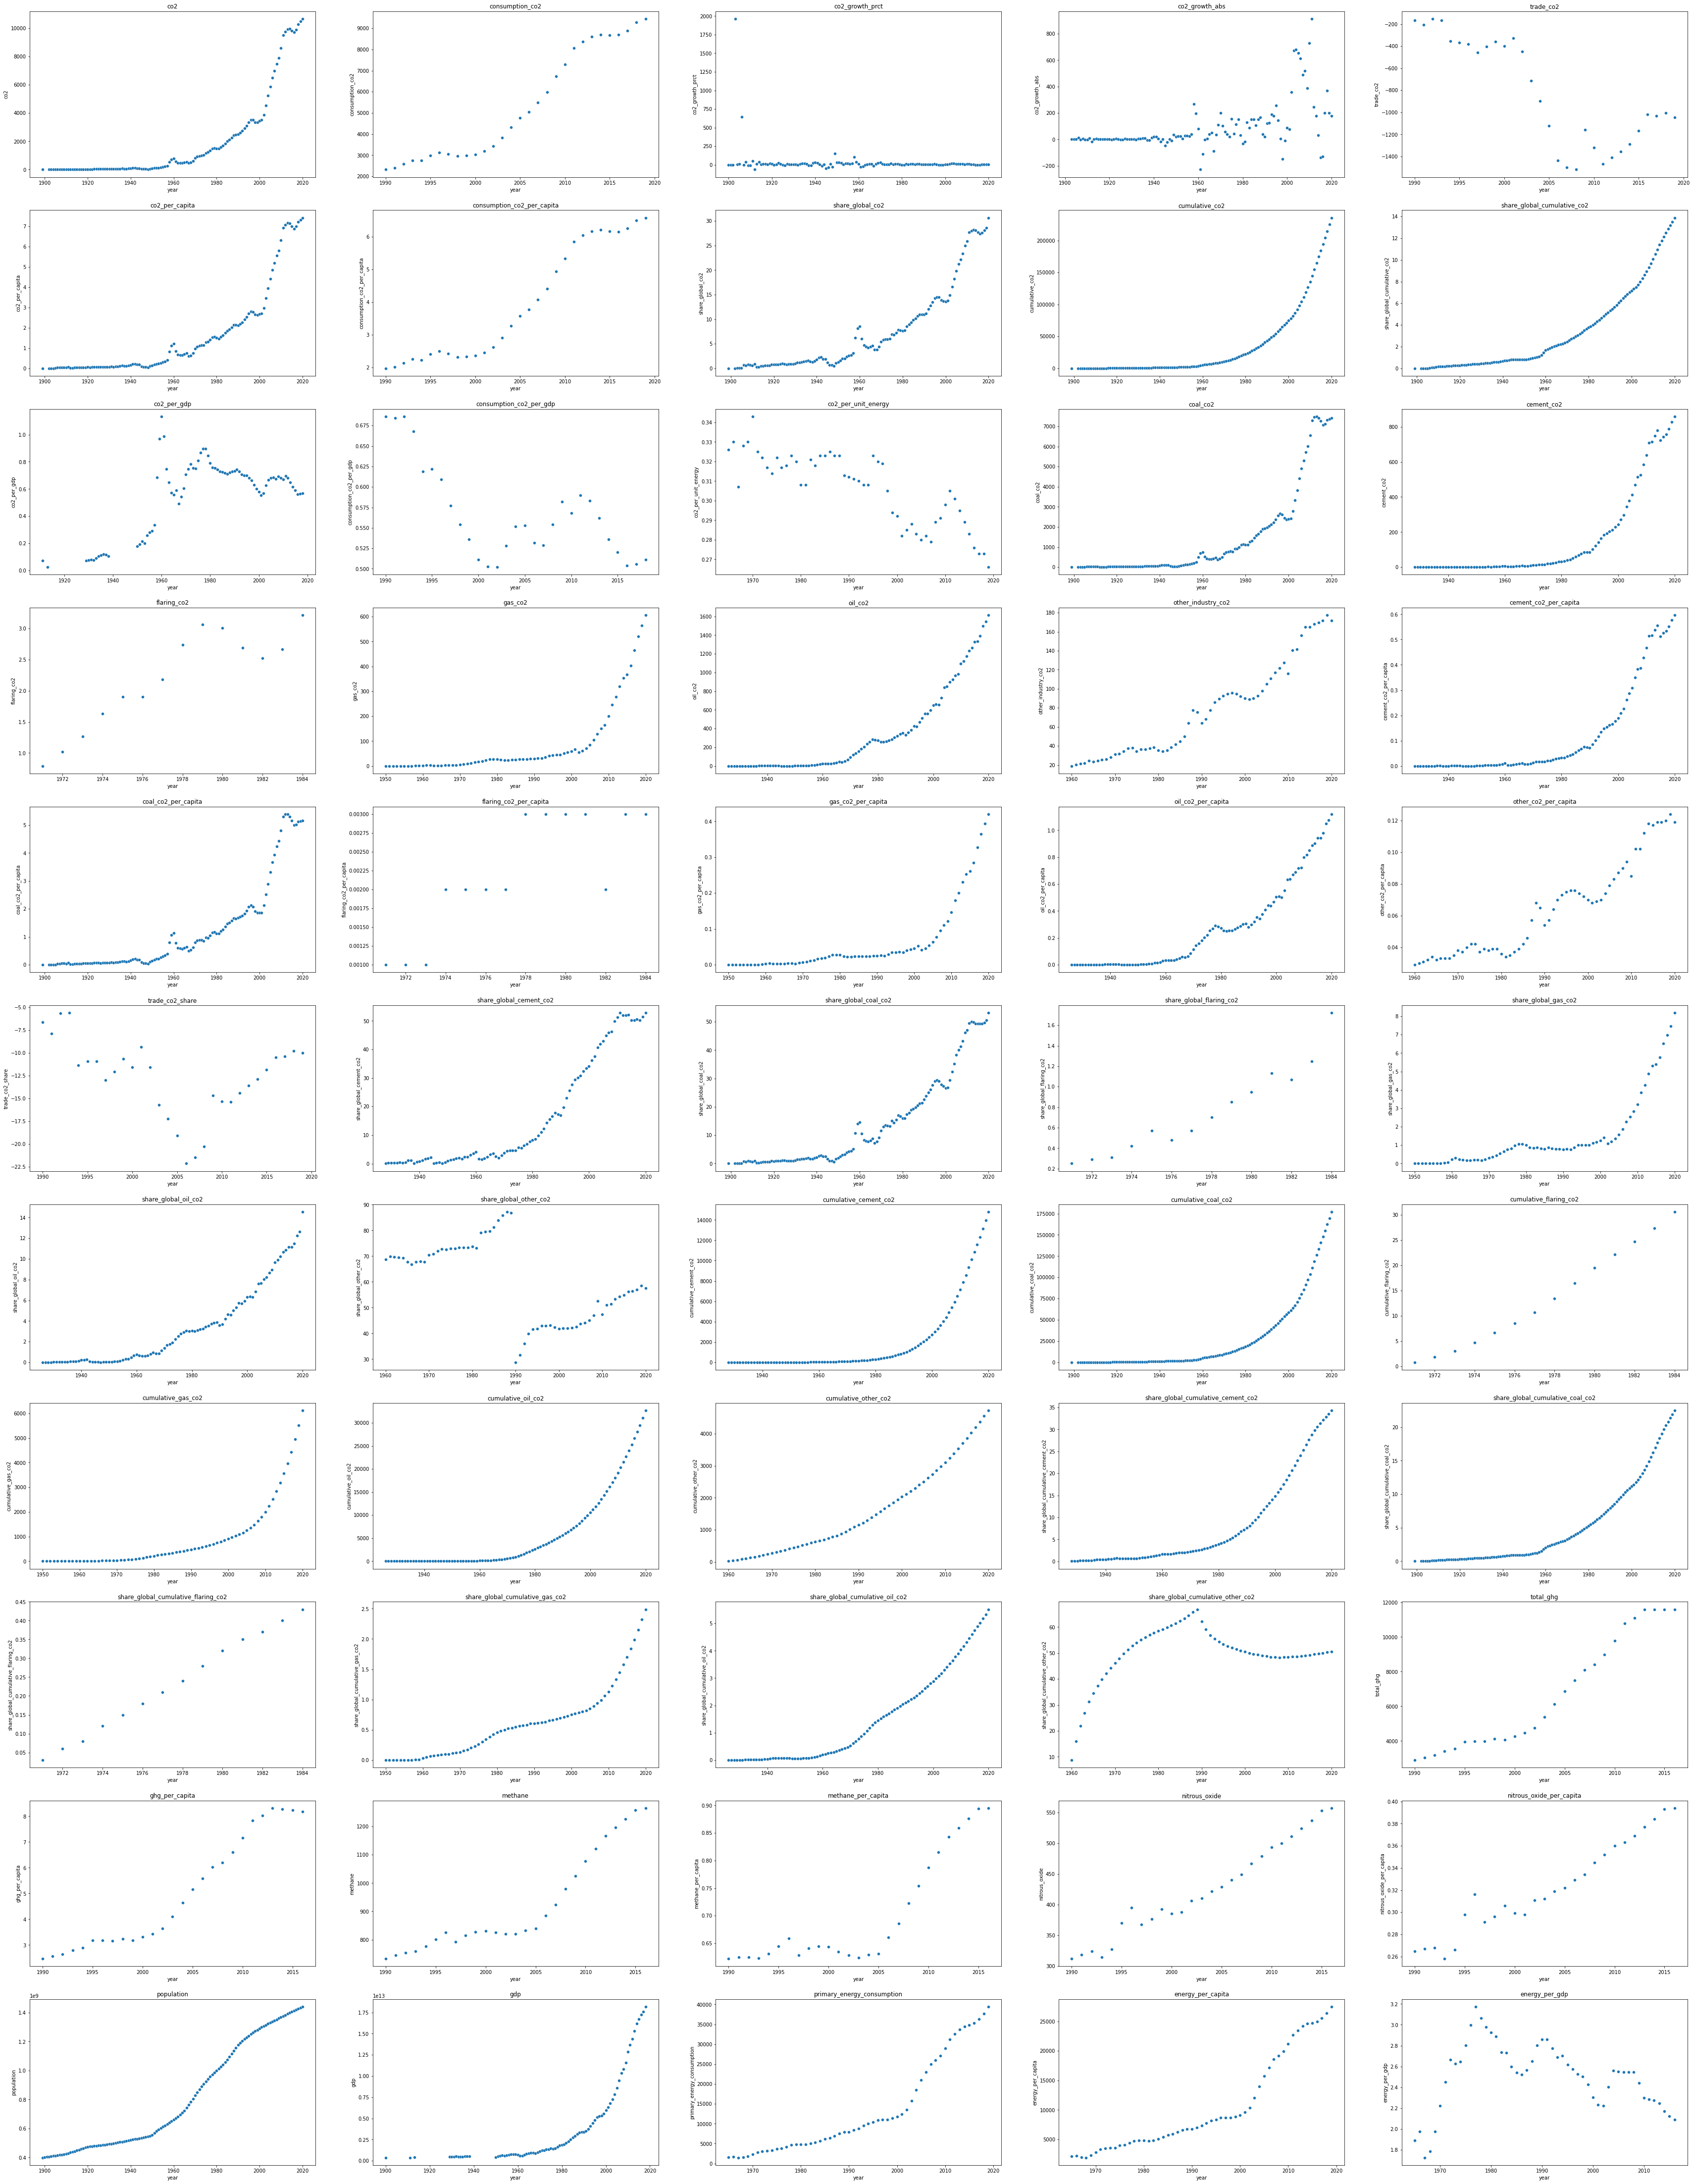

In [ ]:
figure, axis = plt.subplots((len(China.columns)-3)//5, 5, figsize=(60,80))
#figure2, axis2 = plt.subplots(6, (len(cancer_df.columns)-1)//6, figsize=(40,30))
column = 0
row = 0
for i in China.columns:
  if i not in China.columns[0:3]:
    sns.scatterplot(data=China, x="year", y=i, ax = axis[row, column])
    axis[row, column].set_title(f'{i}')
    column+=1
    if column == 5:
      row +=1
      column = 0


## Replace missing values

In [ ]:
#Missing Values
def fill_missing_values(country):
  pd.options.mode.chained_assignment = None
  country_data = owid_co2_df[owid_co2_df['country'] == country].copy(deep=True)
  for i in country_data.columns:
    if i not in ['iso_code', 'year', 'country']:
      #Linear interpolation for the column with missing values 
      country_data[i] = country_data[i].interpolate(method='linear')
      #The linear interpolation just works for a forward trend and if we want the data before the years that is have no interpolation
      #We do a moving avarage approach to handle the missing values
      diff_ = [country_data[i].iloc[idx+1] - j for idx, j in enumerate(country_data[i]) if idx < len(country_data[i])-1 and not np.isnan(j)]
      try:
        avg_augmentation = sum(diff_)/len(diff_) 
      except:
        avg_augmentation = 0
      try:
        for j in reversed(country_data[i].loc[country_data[i].isnull()].index):
          try: 
            val_to_fill = country_data[i].loc[j+1] - avg_augmentation
          except:
            val_to_fill = 0
          if val_to_fill > 0:
            country_data[i].loc[j] = val_to_fill
          else:
            country_data[i].loc[j] = 0
      except IndexError:
        pass
  return country_data


In [ ]:
China_filled = fill_missing_values('China')

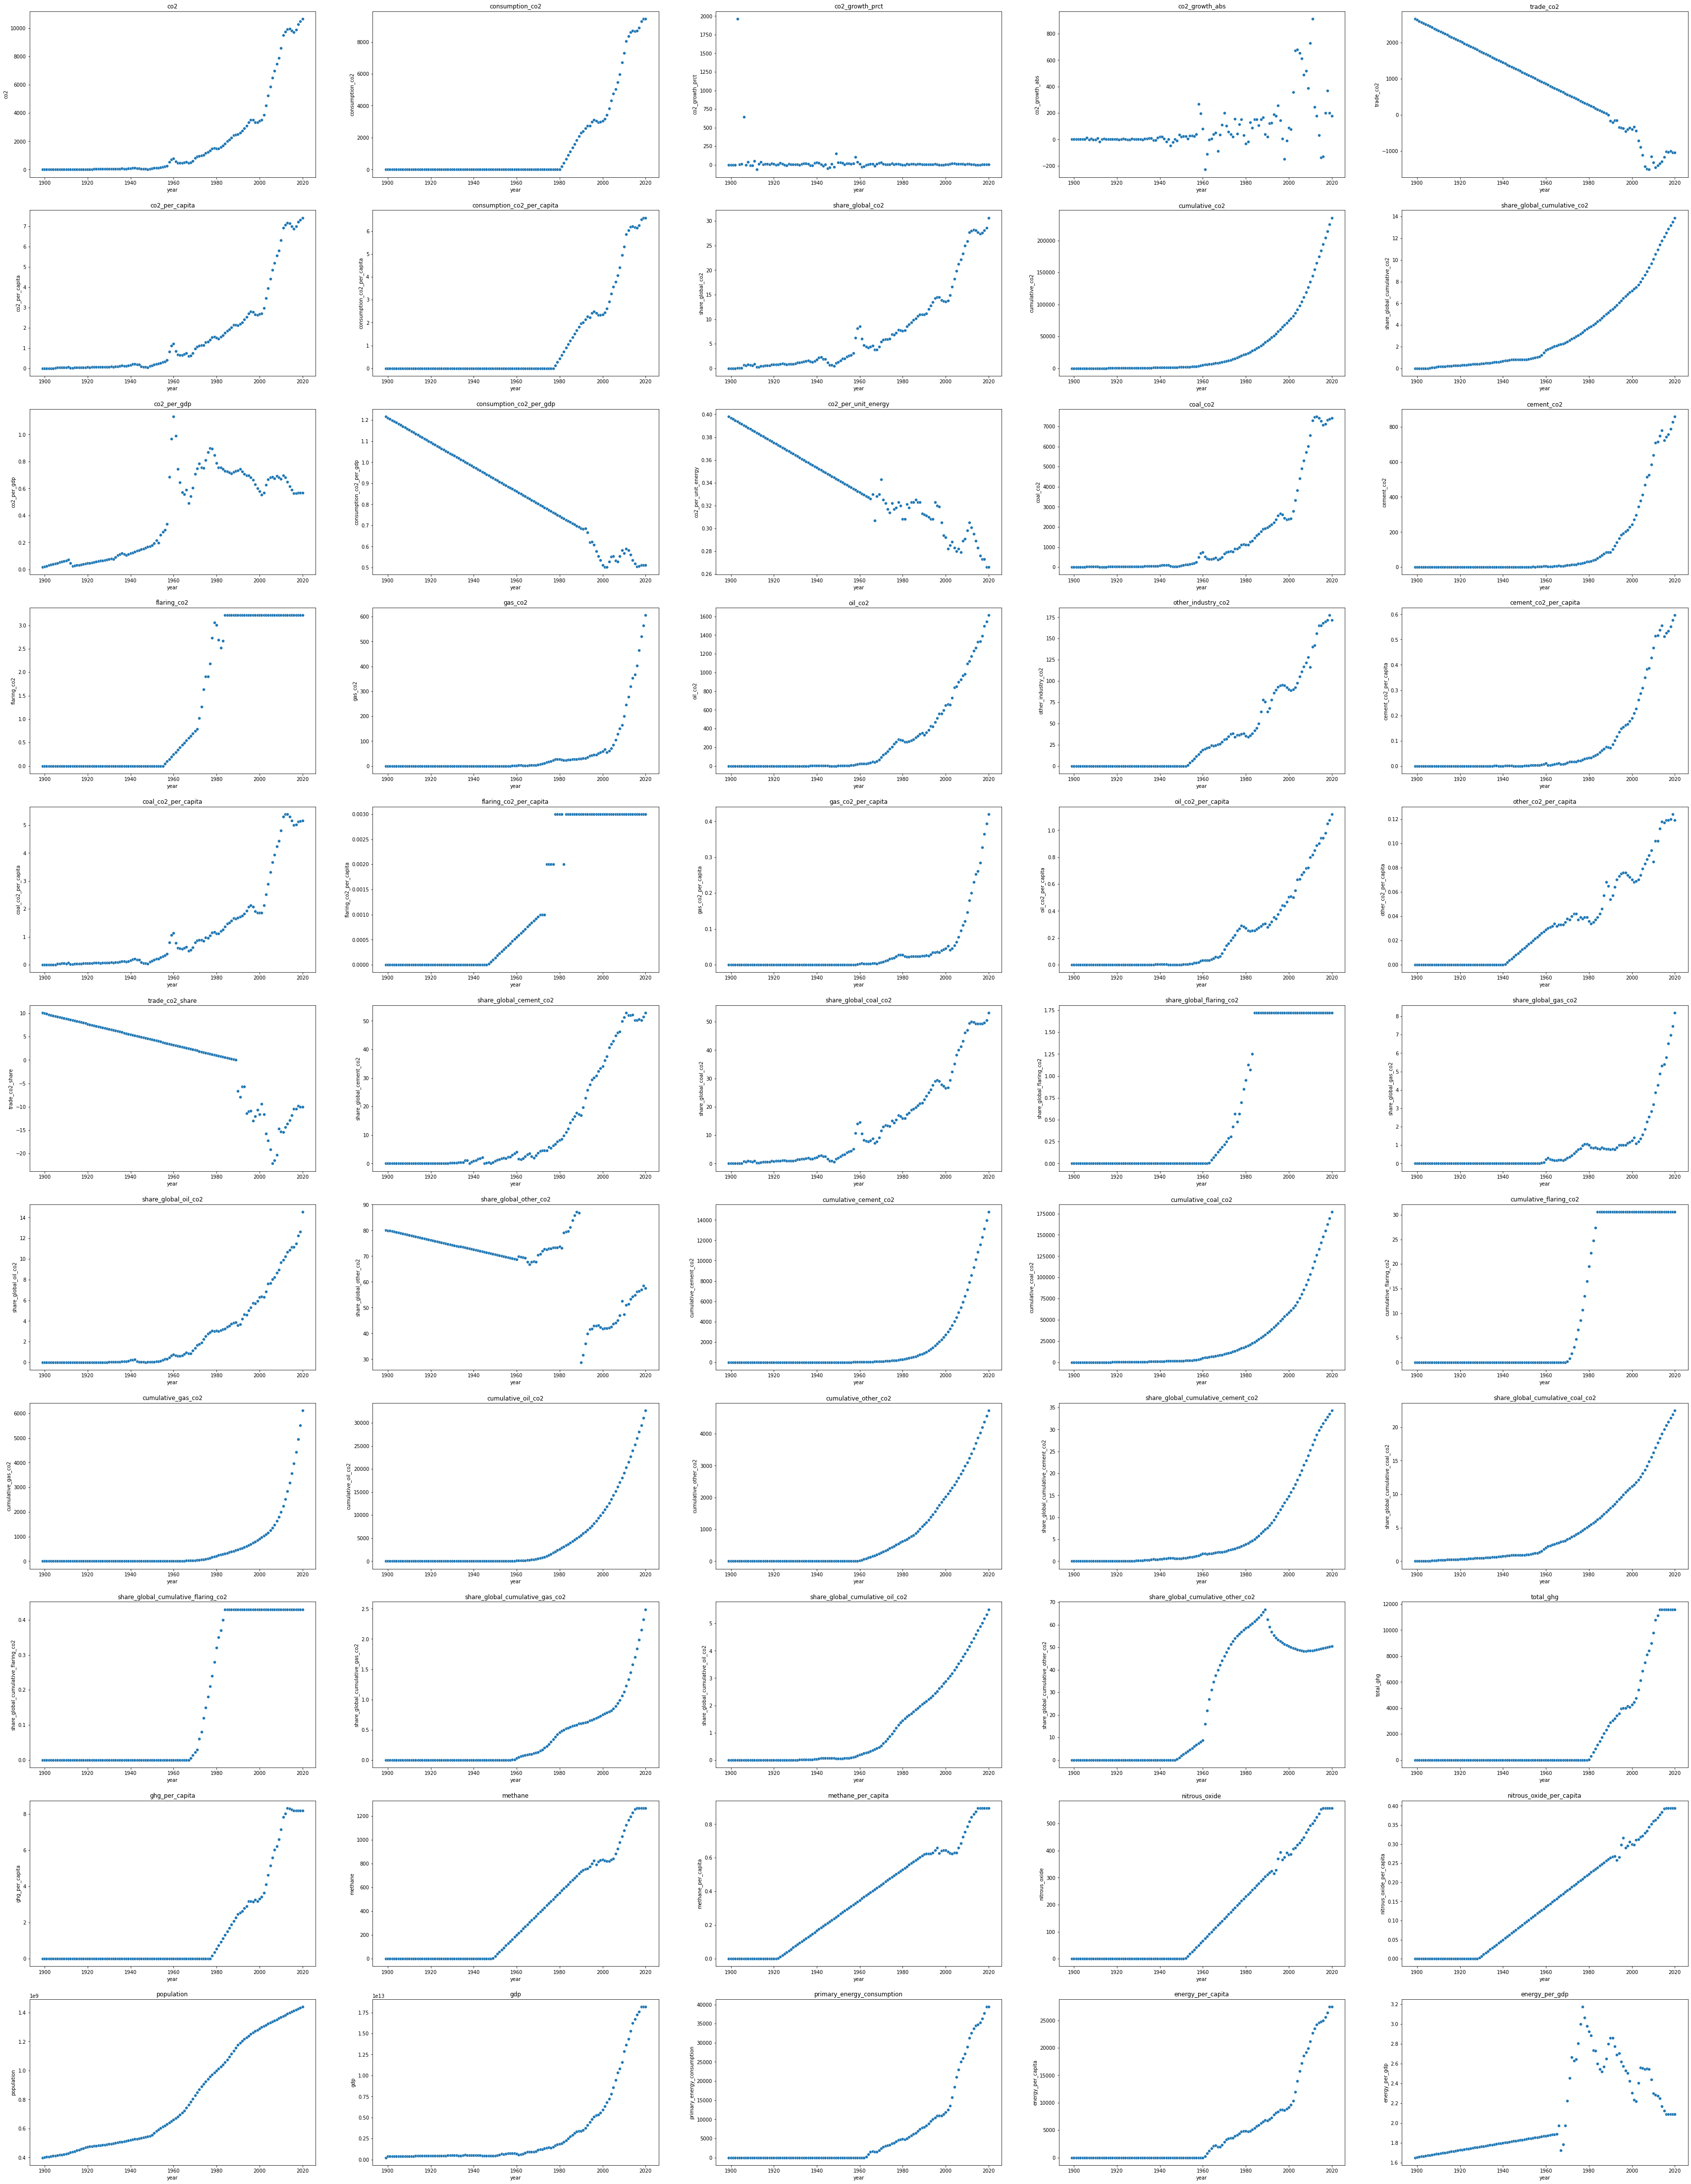

In [ ]:
figure, axis = plt.subplots((len(China_filled.columns)-3)//5, 5, figsize=(60,80))
#figure2, axis2 = plt.subplots(6, (len(cancer_df.columns)-1)//6, figsize=(40,30))
column = 0
row = 0
for i in China_filled.columns:
  if i not in China_filled.columns[0:3]:
    sns.scatterplot(data=China_filled, x="year", y=i, ax = axis[row, column])
    axis[row, column].set_title(f'{i}')
    column+=1
    if column == 5:
      row +=1
      column = 0


### Save a new file with the missing values already filled

In [ ]:
owid_co2_filled_df = owid_co2_df.copy(deep=True) 
new_country_names = sorted(set(owid_co2_filled_df['country']))
for idx, i in enumerate(new_country_names): 
    country_data = owid_co2_df[owid_co2_df['country'] == i] 
    owid_co2_filled_df.loc[country_data.index] = fill_missing_values(i)
    

In [ ]:
owid_co2_filled_df.to_csv('owid_co2_filled.csv', encoding='utf-8', index=False)